In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv("Google_Stock_Price_Train.csv")
train_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
train_df.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [ ]:
test_df = pd.read_csv("Google_Stock_Price_Test.csv")
test_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
train = train_df.loc[:,["Open"]].values
train.shape
print(train)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
print(train_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [ ]:
x_train = []
y_train = []
time = 60
for i in range(60,train_scaled.shape[0]):
    x_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
x_train.shape,y_train.shape

((1198, 60), (1198,))

In [ ]:
x_train = np.reshape(x_train,newshape=(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,Dropout

# initialisinig the RNN
model = Sequential()

# first RNN layer
model.add(SimpleRNN(units = 100, activation="relu", return_sequences=True ,input_shape = (x_train.shape[1], 1)))

# second RNN layer
model.add(SimpleRNN(units = 100, activation="relu", return_sequences=True))

# third RNN layer
model.add(SimpleRNN(units = 100 , activation="relu", return_sequences=True))

# fourth RNN layer
model.add(SimpleRNN(units = 100))

# Adding thw output Layer
model.add(Dense(units=1))

# Compiling the RNN
model.compile(optimizer= "adam", loss='mean_squared_error',metrics=['mae'])

model.fit(x_train, y_train, epochs =10, batch_size = 1)

C:\Users\Ashvini Mahajan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 61s 35ms/step - loss: 0.0149 - mae: 0.0623
Epoch 2/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - loss: 0.0016 - mae: 0.0283
Epoch 3/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 79s 66ms/step - loss: 0.0012 - mae: 0.0250
Epoch 4/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 79s 66ms/step - loss: 9.9532e-04 - mae: 0.0227
Epoch 5/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 71s 59ms/step - loss: 0.0024 - mae: 0.0307
Epoch 6/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - loss: 0.0010 - mae: 0.0234
Epoch 7/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 68s 57ms/step - loss: 0.0010 - mae: 0.0219
Epoch 8/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 79s 66ms/step - loss: 7.8104e-04 - mae: 0.0200
Epoch 9/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 66s 55ms/step - loss: 0.0013 - mae: 0.0194
Epoch 10/10
1198/1198 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - loss: 9.6825e-04 - mae: 0.0233


In [ ]:
# test data set

data = pd.concat((train_df['Open'],test_df['Open']),axis=0)
test_input = data.iloc[len(data) - len(test_df) - time : ].values
test_input.shape

(80,)

In [ ]:
test_input = test_input.reshape(-1,1)
test_input.shape

(80, 1)

In [ ]:
test_scaled = scaler.transform(test_input)

In [ ]:
x_test = []
for i in range(time,test_scaled.shape[0]):
    x_test.append(test_scaled[i - time: i,0 ])
x_test = np.array(x_test)
x_test.shape

(20, 60)

In [ ]:
y_test = test_df.loc[:,"Open"].values

In [ ]:
# predictiton

y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 854ms/step


In [ ]:
# evaluation unscaled

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) #R2 score near to 0.7 shows is good for stock prediction

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 6.230399414062498
RMSE: 8.658696676381085
R² Score: 0.6550421114889007


In [ ]:
y_test_scaled = scaler.transform(y_test.reshape(-1, 1)).flatten()

loss, mae = model.evaluate(x_test, y_test_scaled)
print("Test MSE (scaled):", loss)
print("Test MAE (scaled):", mae)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 2.5945e-04 - mae: 0.0116
Test MSE (scaled): 0.0002594467077869922
Test MAE (scaled): 0.011590063571929932


In [ ]:
# if + - 32 is allowed
def stock_prediction_accuracy(y_true, y_pred, tolerance=5):  # tolerance in price units (like $32)
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    correct = np.abs(y_true - y_pred) <= tolerance
    return np.mean(correct)

accuracy = stock_prediction_accuracy(y_test, y_pred, tolerance=32)
print("Accuracy",accuracy)

Accuracy 0.9025


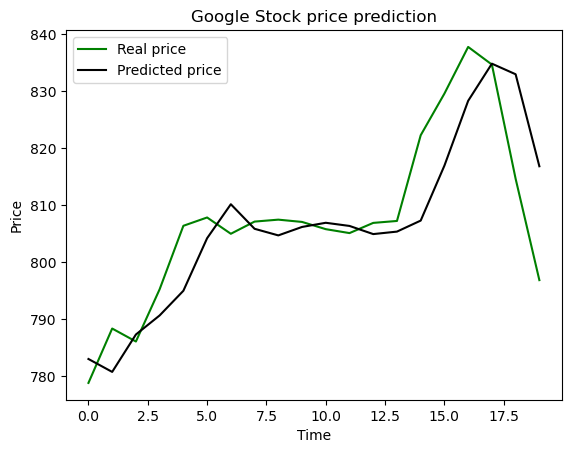

In [ ]:
plt.plot(y_test, color = 'green', label = 'Real price')
plt.plot(y_pred, color = 'black', label = 'Predicted price')

plt.title('Google Stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()